In [1]:
import matplotlib.pyplot as plt
import os
import tensorflow as tf
import matplotlib
matplotlib.style.use('ggplot')

In [2]:
IMAGE_SHAPE = (224, 224)

DATA_DIR = 'D:/OneDrive - Hanoi University of Science and Technology/BackUp/EDABK/AI/Data_AI_EDABK/TuTheNgu/EDABK_IR_23CLASS_LOSO/S1'

TRAINING_DATA_DIR = DATA_DIR + '/' + 'train_aug'
VALID_DATA_DIR = DATA_DIR + '/' + 'test'

In [3]:
datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255
)
train_generator = datagen.flow_from_directory(
    TRAINING_DATA_DIR,
    shuffle=True,
    target_size=IMAGE_SHAPE,
)
valid_generator = datagen.flow_from_directory(
    VALID_DATA_DIR,
    shuffle=False,
    target_size=IMAGE_SHAPE,
)

Found 20052 images belonging to 23 classes.
Found 1090 images belonging to 23 classes.


In [4]:
def build_model(num_classes):
    model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=8, kernel_size=(3, 3), activation='relu', 
                           input_shape=(224, 224, 3)),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=2),
    tf.keras.layers.Conv2D(filters=16, kernel_size=(3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=2),
    tf.keras.layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(num_classes, activation='softmax')
    ])
    return model
model = build_model(num_classes=23)

In [5]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
    loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 8)       224       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 8)      0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 16)      1168      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 16)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 32)        4640      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 26, 26, 32)       0

In [6]:
EPOCHS = 30
BATCH_SIZE = 1000
history = model.fit(train_generator,
                    steps_per_epoch=train_generator.samples // BATCH_SIZE,
                    epochs=EPOCHS,
                    validation_data=valid_generator,
                    validation_steps= valid_generator.samples // BATCH_SIZE,
                    verbose=1
                    )

Epoch 1/30


c:\Users\phamd\AppData\Local\Programs\Python\Python310\lib\site-packages\tensorflow\python\util\dispatch.py:1082: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


20/20 [==============================] - 14s 411ms/step - loss: 3.1347 - accuracy: 0.0500 - val_loss: 3.1507 - val_accuracy: 0.0000e+00
Epoch 2/30
20/20 [==============================] - 10s 503ms/step - loss: 3.1114 - accuracy: 0.0641 - val_loss: 3.0611 - val_accuracy: 0.0000e+00
Epoch 3/30
20/20 [==============================] - 7s 350ms/step - loss: 3.1070 - accuracy: 0.0781 - val_loss: 3.0984 - val_accuracy: 0.0000e+00
Epoch 4/30
20/20 [==============================] - 6s 302ms/step - loss: 3.1103 - accuracy: 0.0625 - val_loss: 3.0429 - val_accuracy: 0.0000e+00
Epoch 5/30
20/20 [==============================] - 6s 300ms/step - loss: 3.1065 - accuracy: 0.0688 - val_loss: 3.0364 - val_accuracy: 0.0000e+00
Epoch 6/30
20/20 [==============================] - 6s 290ms/step - loss: 3.0693 - accuracy: 0.1031 - val_loss: 2.9967 - val_accuracy: 0.0000e+00
Epoch 7/30
20/20 [==============================] - 5s 261ms/step - loss: 3.0807 - accuracy: 0.0750 - val_loss: 2.9813 - val_accuracy

In [7]:
print("Training is done!")
model.save('./model/modelLOSO_Test.h5')
print("Model is successfully stored!")

Training is done!
Model is successfully stored!


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])
dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


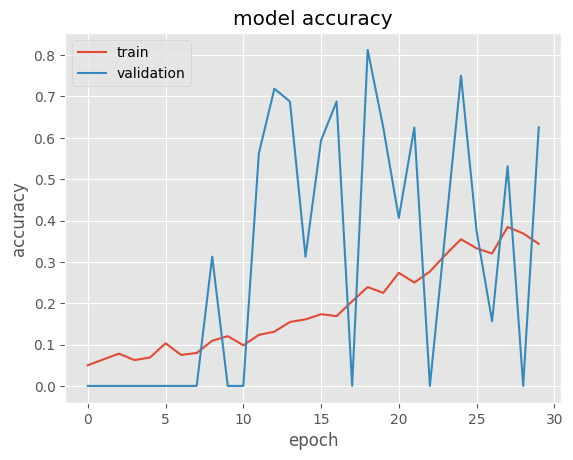

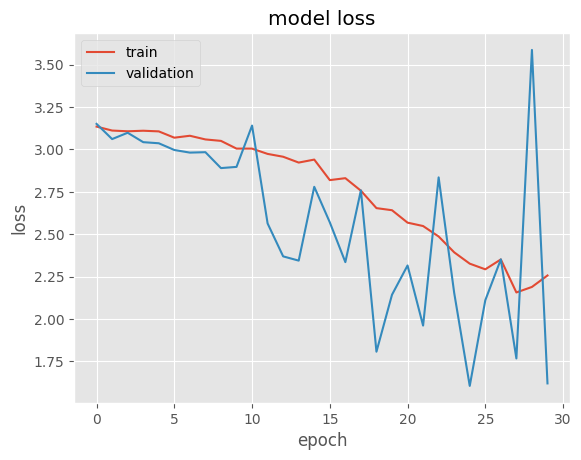

In [8]:
print(history.history.keys())
train_loss = history.history['loss']
train_acc = history.history['accuracy']
valid_loss = history.history['val_loss']
valid_acc = history.history['val_accuracy']

print(history.history.keys())

#  "Accuracy"
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()